In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# 2.1 Implementación y visualización de k-means en 2D

In [4]:
df_k1 = pd.read_csv("kmeans1.csv", encoding="latin1", sep=",")
df_k1.head()

,A,B
0,-3.032505,-3.367918
1,-2.603797,-1.616394
2,-1.357223,-0.199628
3,-2.992206,-3.523316
4,-1.708192,-1.007209


# Normalización con MinMax

In [ ]:
min_max_scaler = MinMaxScaler() 
escalado = min_max_scaler.fit_transform(df_k1)
df_escalado = pd.DataFrame(escalado)
df_escalado = df_escalado.rename(columns = {0: "A_escalado", 1: "B_escalado"})
df_escalado.head()

,A_escalado,B_escalado
0,0.067984,0.047531
1,0.089996,0.141370
2,0.154003,0.217274
3,0.070053,0.039205
4,0.135982,0.174007


# Gráfico de dispersión 

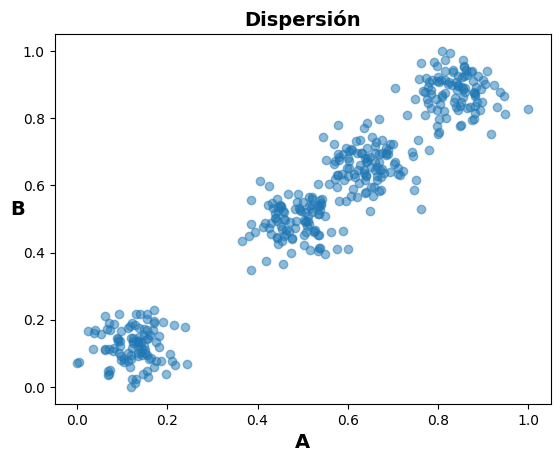

In [17]:
fig, ax = plt.subplots()
ax.set_title("Dispersión", loc = "center", fontdict = {"fontsize":14, "fontweight":"bold"})
ax.set_xlabel("A", fontdict = {"fontsize":14, "fontweight":"bold"})
ax.set_ylabel("B", fontdict = {"fontsize":14, "fontweight":"bold"}, rotation=0)
plt.scatter(df_escalado["A_escalado"], df_escalado["B_escalado"], alpha = 0.5)
plt.show()

# Centroides

In [7]:
kmeans = KMeans(n_clusters=4).fit(df_escalado)
centroides = kmeans.cluster_centers_
centroides

array([[0.64504777, 0.66137917],
       [0.12488096, 0.1225848 ],
       [0.48395258, 0.49330798],
       [0.83902637, 0.87789952]])

# Asignación de cluster

In [8]:
labels = kmeans.labels_
print(labels)

df_k1["cluster"] = labels
print(df_k1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
             A          B  cluster
0    -3.032505  -3.367918        1
1    -2.603797  -1.616394        1
2    -1.357223  -0.199628        1
3    -2.992206  -3.523316        1
4    -1.70819

# Distancia dentro de las clases

In [9]:
print(f"Inercia: {kmeans.inertia_}")

Inercia: 2.1761149778977487


# Cálculo de 10 Clusters

In [10]:
inercias = []
for k in range(1,11):
    kmeans_k = KMeans(n_clusters=k).fit(df_escalado)
    inercias.append(kmeans_k.inertia_)
print(inercias)

[60.00208300828672, 15.793568251801185, 4.780002528539193, 2.1761149778977487, 1.9701054643092681, 1.773554178961119, 1.617619946579665, 1.4578981062708012, 1.2590523890557592, 1.1641335677107079]


# Argumentos modificados

In [11]:
kmeans_mod = KMeans(n_clusters=4,init="k-means++",n_init="auto",max_iter=900).fit(df_escalado)
centroides_mod = kmeans_mod.cluster_centers_
inercia_mod = kmeans_mod.inertia_

print(f"Centorides kmenas_mod: {centroides_mod}")
print(f"Inercia inercia_mod: {inercia_mod}")

Centorides kmenas_mod: [[0.12488096 0.1225848 ]
 [0.48395258 0.49330798]
 [0.83902637 0.87789952]
 [0.64504777 0.66137917]]
Inercia inercia_mod: 2.1761149778977487


# Gráfica del codo

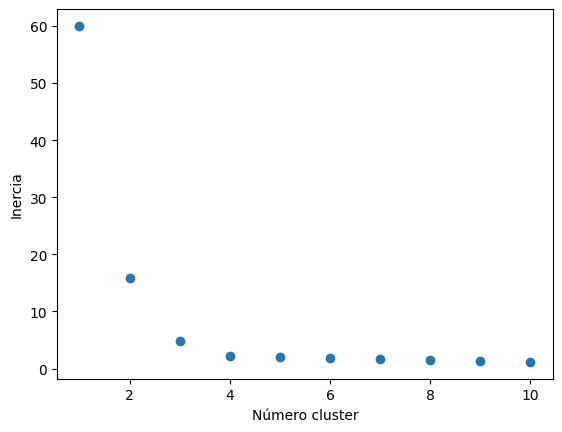

In [12]:
plt.scatter(range(1,11), inercias)
plt.xlabel("Número cluster")
plt.ylabel("Inercia")
plt.show()

El mejor número de cluster a mi parecer es 4, ya que la distancia intra cluster es la más baja.

# 2.2 Análisis de clusters

In [13]:
df_k2 = pd.read_csv("kmeans2.csv", encoding="latin1", sep=",")
df_k2.head()

,PAC_EDAD,SATO2,TEMPERATURA,GLASGOW,EVA,HGT,FR,DIAS_HOSP
0,79,89.0,35.8,15.0,3.0,121.0,14.0,21.0
1,35,96.0,36.4,15.0,2.0,121.0,16.0,33.0
2,25,98.0,35.5,15.0,2.0,121.0,18.0,17.0
3,34,98.0,37.0,15.0,2.0,121.0,18.0,1.0
4,45,98.0,36.8,15.0,2.0,121.0,18.0,11.0


In [14]:
df_k2.describe()

,PAC_EDAD,SATO2,TEMPERATURA,GLASGOW,EVA,HGT,FR,DIAS_HOSP
count,129989.000000,129989.000000,129989.000000,129989.000000,129989.000000,129989.000000,129989.000000,129989.000000
mean,29.640393,97.129665,36.749640,14.961189,3.825870,170.769234,18.480371,1.508397
std,26.265418,2.820980,0.661044,0.390000,1.836665,86.536655,3.641386,5.065411
min,0.000000,0.000000,34.000000,3.000000,1.000000,11.000000,3.000000,0.000000
25%,6.000000,97.000000,36.400000,15.000000,2.000000,109.000000,16.000000,1.000000
50%,22.000000,98.000000,36.700000,15.000000,4.000000,140.000000,18.000000,1.000000
75%,51.000000,98.000000,37.000000,15.000000,5.000000,210.000000,19.000000,1.000000
max,136.000000,100.000000,42.000000,15.000000,10.000000,599.000000,99.000000,208.000000


In [15]:
df_k2.isnull().count()

PAC_EDAD       129989
SATO2          129989
TEMPERATURA    129989
GLASGOW        129989
EVA            129989
HGT            129989
FR             129989
DIAS_HOSP      129989
dtype: int64

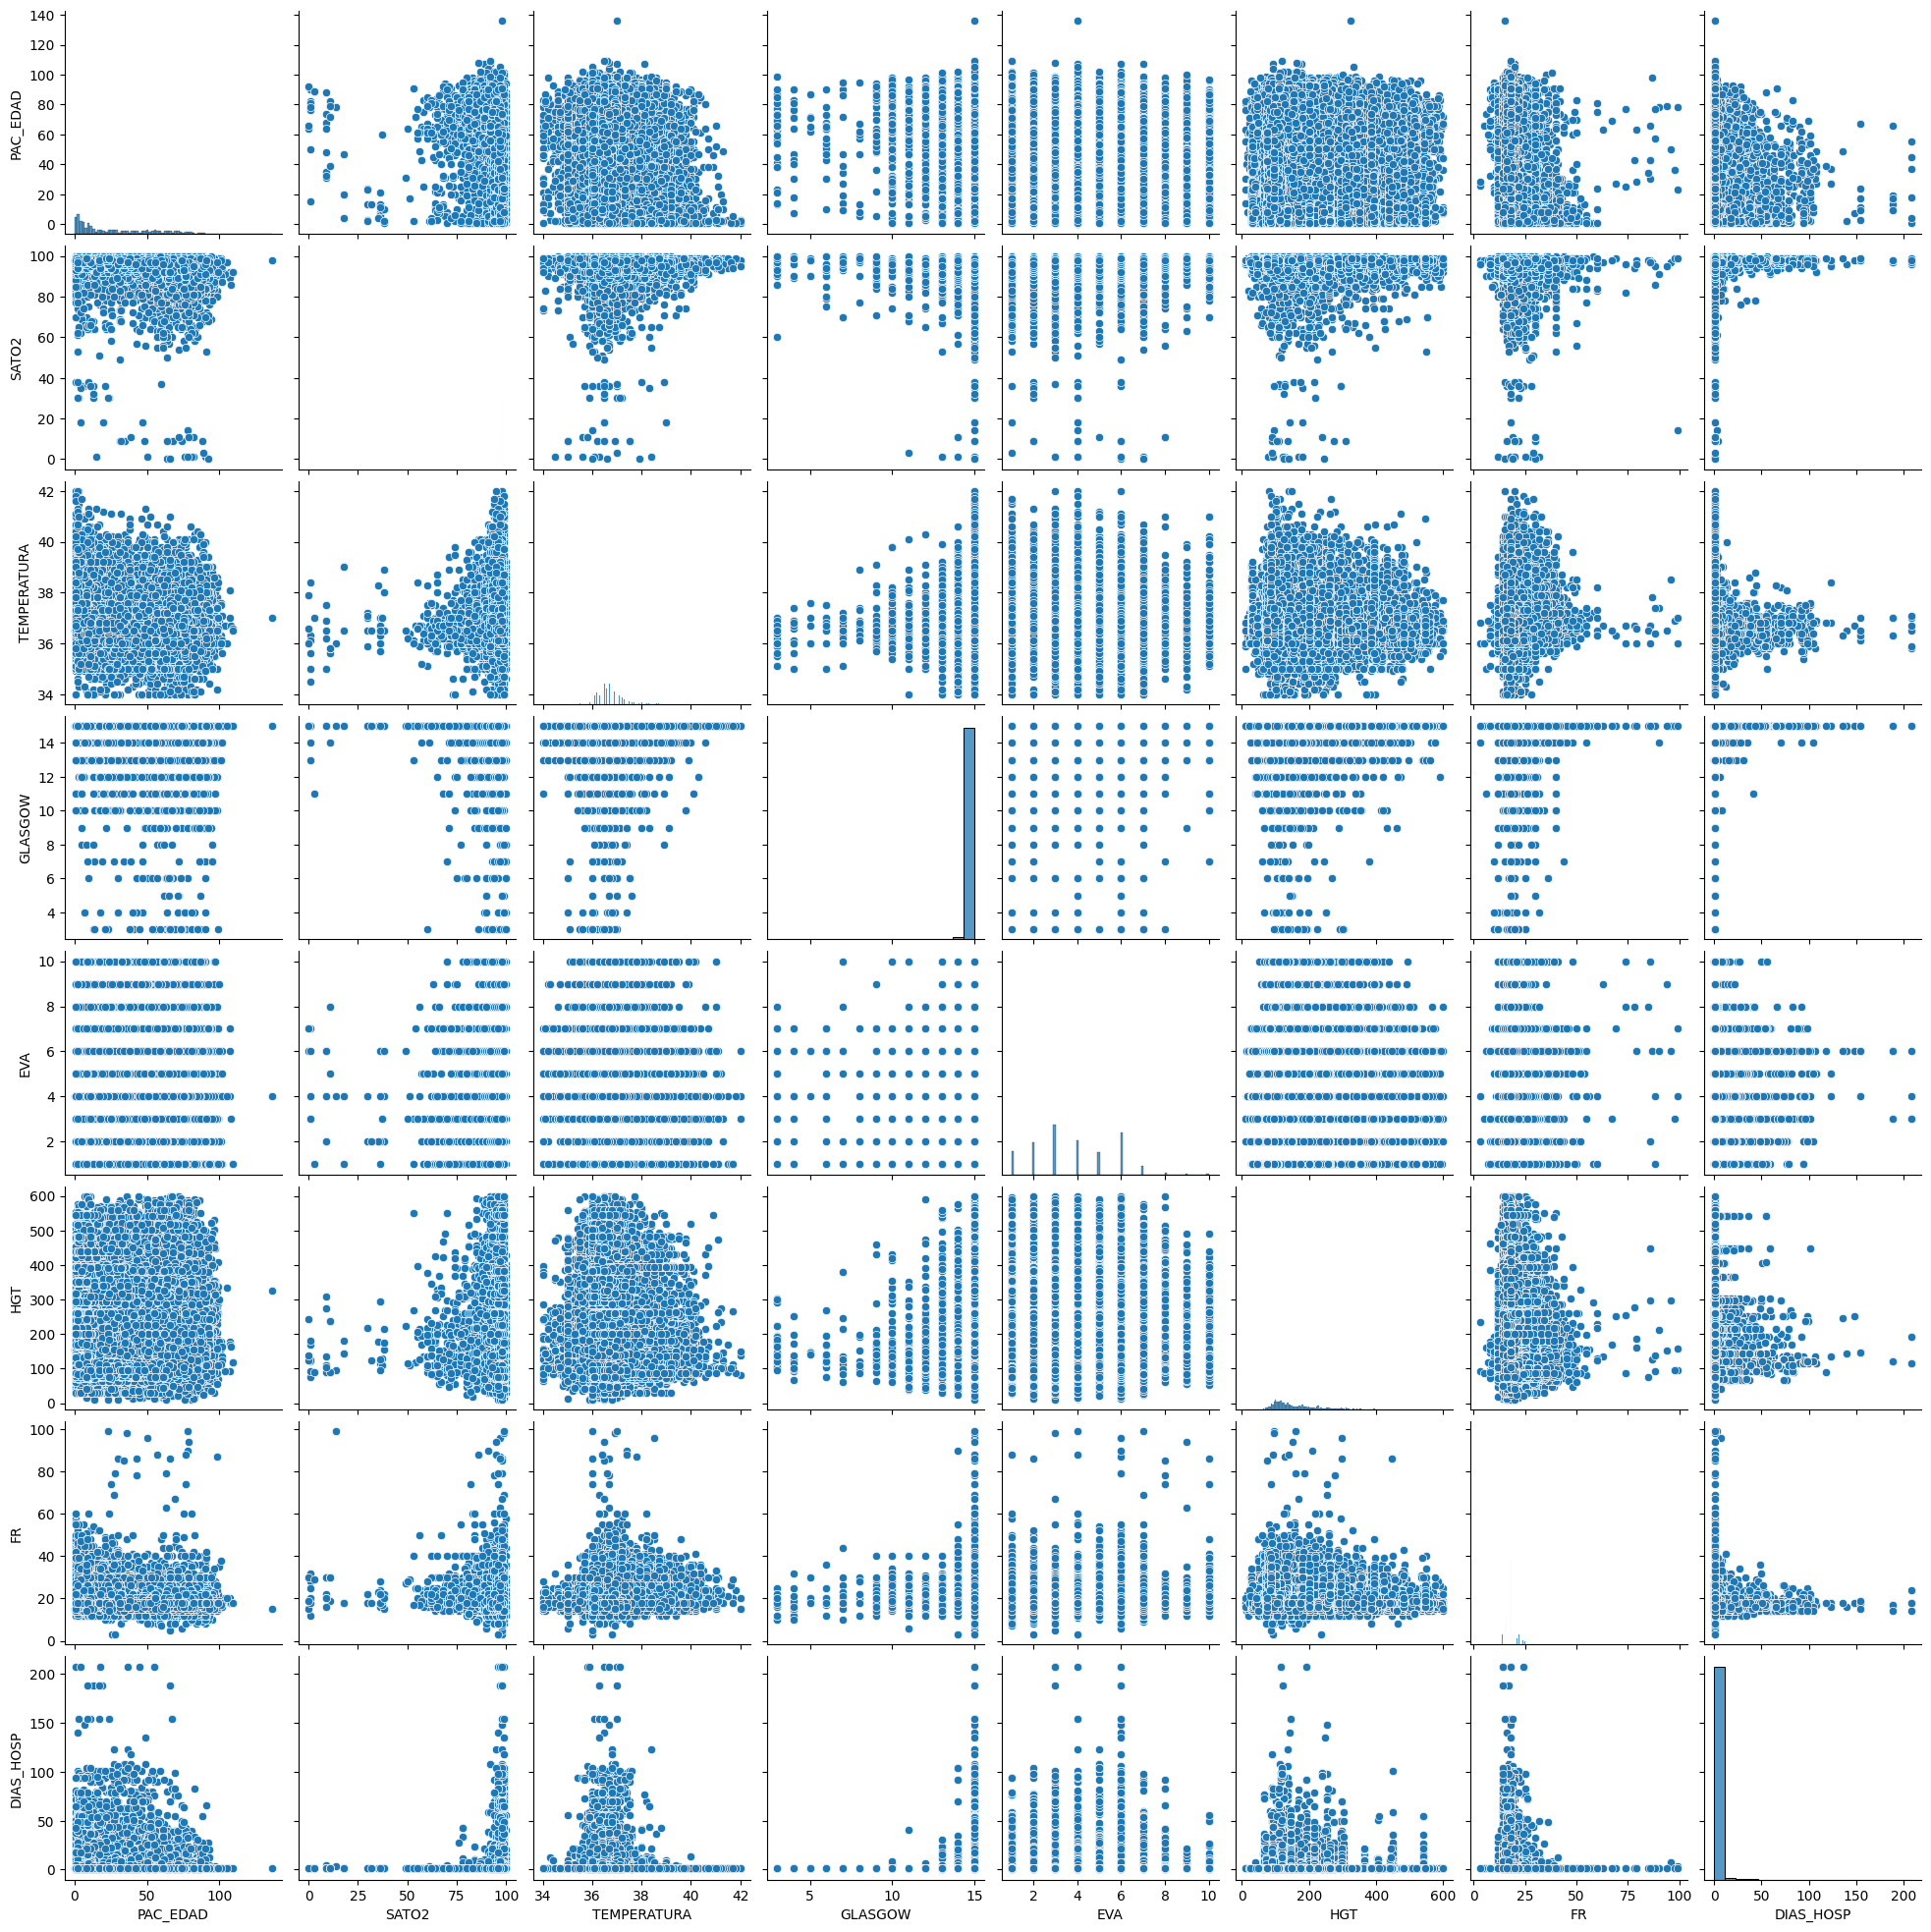

In [16]:
sns.pairplot(df_k2)
plt.show()

In [19]:
min_max_scaler_k2 = MinMaxScaler() 
escalado_k2 = min_max_scaler_k2.fit_transform(df_k2)
df_escalado_k2 = pd.DataFrame(escalado_k2)
df_escalado_k2 = df_escalado_k2.rename(columns = {0:"PAC_EDAD_ESC", 1:"SATO2_ESC", 2:"TEMPERATURA_ESC", 3:"GLASGOW_ESC", 4:"EVA_ESC", 5:"HGT_ESC", 6:"FR_ESC", 7:"DIAS_HOSP_ESC"})
df_escalado_k2

,PAC_EDAD_ESC,SATO2_ESC,TEMPERATURA_ESC,GLASGOW_ESC,EVA_ESC,HGT_ESC,FR_ESC,DIAS_HOSP_ESC
0,0.580882,0.89,0.2250,1.0,0.222222,0.187075,0.114583,0.100962
1,0.257353,0.96,0.3000,1.0,0.111111,0.187075,0.135417,0.158654
2,0.183824,0.98,0.1875,1.0,0.111111,0.187075,0.156250,0.081731
3,0.250000,0.98,0.3750,1.0,0.111111,0.187075,0.156250,0.004808
4,0.330882,0.98,0.3500,1.0,0.111111,0.187075,0.156250,0.052885
...,...,...,...,...,...,...,...,...
129984,0.058824,0.99,0.2625,1.0,0.000000,0.108844,0.114583,0.004808
129985,0.176471,0.99,0.2625,1.0,0.000000,0.108844,0.114583,0.004808
129986,0.382353,0.97,0.3125,1.0,0.000000,0.108844,0.156250,0.004808
129987,0.411765,0.97,0.2625,1.0,0.000000,0.108844,0.177083,0.004808


In [39]:
kmeans_k2 = KMeans(n_clusters=10).fit(df_escalado_k2)
centroides_k2 = kmeans_k2.cluster_centers_
centroides_k2

array([[0.29864096, 0.97524737, 0.32626949, 0.99771738, 0.42092991,
        0.21623924, 0.14673585, 0.00807765],
       [0.07885721, 0.97484405, 0.35591338, 0.99897962, 0.261824  ,
        0.2066577 , 0.16053275, 0.00774752],
       [0.41364768, 0.96868889, 0.32442984, 0.99473307, 0.57073703,
        0.51202095, 0.15507176, 0.00756506],
       [0.46680343, 0.96330868, 0.3213976 , 0.99298231, 0.18184674,
        0.21422802, 0.15285385, 0.0061501 ],
       [0.07255528, 0.9736082 , 0.35564567, 0.99925876, 0.1350286 ,
        0.47592797, 0.16446364, 0.00608659],
       [0.09982419, 0.97541019, 0.35256176, 0.99921216, 0.46613127,
        0.52500114, 0.16549126, 0.00919605],
       [0.42780793, 0.96704325, 0.32173368, 0.99675218, 0.20910303,
        0.53112628, 0.15076502, 0.00593194],
       [0.08361744, 0.97464909, 0.36202044, 0.99816725, 0.55675617,
        0.21268239, 0.17777005, 0.00843839],
       [0.48862042, 0.96339125, 0.32196728, 0.98862682, 0.57547113,
        0.21489277, 0.157241

In [40]:
labels_k2 = kmeans_k2.labels_
print(labels_k2)

[3 9 9 ... 3 3 3]


In [41]:
print(f"Inercia: {kmeans_k2.inertia_}")

Inercia: 4085.77895030973


In [44]:
inercias_k2 = []
for k in range(1,11):
    kmeans_k_k2 = KMeans(n_clusters=k).fit(df_escalado_k2)
    inercias_k2.append(kmeans_k_k2.inertia_)
print(inercias_k2)

[14469.699238126115, 10314.815666979717, 7754.558180170612, 6640.997800256892, 5589.341461678118, 5085.504579453566, 4733.023286161354, 4633.984064296856, 4303.287786454964, 4119.670273000762]


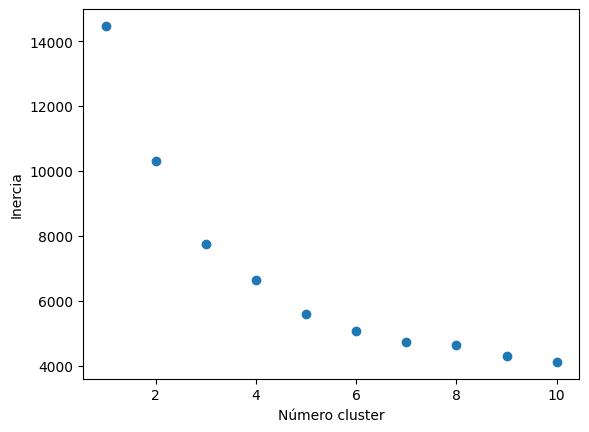

In [45]:
plt.scatter(range(1,11), inercias_k2)
plt.xlabel("Número cluster")
plt.ylabel("Inercia")
plt.show()